In [1]:
# 6.1.4 Generate Random Latitudes and Longitudes
    # Create Latitude and Longitude Combinations

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Unpack lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once. 

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [7]:
#6.2.6: Get the City Weather Data

import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime


In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
#create an empty list to hold the weather data.
city_data=[]
# Print the begining of the logging.
print("Beginning Data Retrieval")
print("------------------------")

#create counters
record_count=1
set_count=1

# In the code block, we have initialized the counters at 1 because we want the first iteration of the logging... 
# for each recorded response and the set to start at 1.

Beginning Data Retrieval
------------------------


In [10]:
# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
       # set_count += 1
        #record_count = 1
    # Create endpoint URL with each city.
        #city_url = url + "&q=" + cities[i]
       # city_url

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | chifeng
Processing Record 2 of Set 1 | margate
Processing Record 3 of Set 1 | cap malheureux
Processing Record 4 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 1 | kruisfontein
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | vila velha
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | port lincoln
Processing Record 12 of Set 1 | pacific grove
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | xuddur
Processing Record 15 of Set 1 | bristol
Processing Record 16 of Set 1 | fairbanks
Processing Record 17 of Set 1 | cayenne
Processing Record 18 of Set 1 | dingle
Processing Record 19 of Set 1 | westport
Processing Record 20 of Set 1 | bartica
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | bacuit
City not found. Skipping...
Proce

Processing Record 39 of Set 4 | aykhal
Processing Record 40 of Set 4 | rio gallegos
Processing Record 41 of Set 4 | saleaula
City not found. Skipping...
Processing Record 42 of Set 4 | kroya
Processing Record 43 of Set 4 | juneau
Processing Record 44 of Set 4 | kautokeino
Processing Record 45 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 46 of Set 4 | saint george
Processing Record 47 of Set 4 | kiunga
Processing Record 48 of Set 4 | marcona
City not found. Skipping...
Processing Record 49 of Set 4 | verkh-usugli
Processing Record 50 of Set 4 | tuatapere
Processing Record 1 of Set 5 | hambantota
Processing Record 2 of Set 5 | chacabuco
Processing Record 3 of Set 5 | dubbo
Processing Record 4 of Set 5 | port-gentil
Processing Record 5 of Set 5 | dikson
Processing Record 6 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 5 | saint-georges
Processing Record 8 of Set 5 | vikulovo
Processing Record 9 of Set 5 | uvira
Processing Record 10 of 

Processing Record 30 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 31 of Set 8 | buchanan
Processing Record 32 of Set 8 | salaga
Processing Record 33 of Set 8 | turayf
Processing Record 34 of Set 8 | adrar
Processing Record 35 of Set 8 | garden city
Processing Record 36 of Set 8 | alofi
Processing Record 37 of Set 8 | sao filipe
Processing Record 38 of Set 8 | gurskoye
City not found. Skipping...
Processing Record 39 of Set 8 | irmo
Processing Record 40 of Set 8 | college
Processing Record 41 of Set 8 | kamiiso
Processing Record 42 of Set 8 | qui nhon
Processing Record 43 of Set 8 | jabiru
City not found. Skipping...
Processing Record 44 of Set 8 | awbari
Processing Record 45 of Set 8 | oksfjord
Processing Record 46 of Set 8 | oistins
Processing Record 47 of Set 8 | guerrero negro
Processing Record 48 of Set 8 | mae hong son
Processing Record 49 of Set 8 | bam
Processing Record 50 of Set 8 | quibdo
Processing Record 1 of Set 9 | manono
Processing Record 2 of Set 9

Processing Record 13 of Set 12 | comodoro rivadavia
Processing Record 14 of Set 12 | romanovka
Processing Record 15 of Set 12 | izumo
Processing Record 16 of Set 12 | lae
Processing Record 17 of Set 12 | chutove
Processing Record 18 of Set 12 | hammerfest
Processing Record 19 of Set 12 | astoria
Processing Record 20 of Set 12 | lhokseumawe
Processing Record 21 of Set 12 | joshimath
Processing Record 22 of Set 12 | zhanakorgan
Processing Record 23 of Set 12 | sorvag
City not found. Skipping...
Processing Record 24 of Set 12 | guozhen
Processing Record 25 of Set 12 | honiara
Processing Record 26 of Set 12 | pangody
Processing Record 27 of Set 12 | santa rosa
Processing Record 28 of Set 12 | tomatlan
Processing Record 29 of Set 12 | tungor
Processing Record 30 of Set 12 | sechura
Processing Record 31 of Set 12 | horodyshche
Processing Record 32 of Set 12 | griffith
Processing Record 33 of Set 12 | esperance
Processing Record 34 of Set 12 | coquimbo
Processing Record 35 of Set 12 | nizhniy

In [12]:
# 6.2.7: Create a DataFrame of City Weather Data

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chifeng,42.2683,118.9636,88.07,49,4,10.98,CN,2021-07-20 04:48:37
1,Margate,51.3813,1.3862,65.30,95,21,7.63,GB,2021-07-20 04:48:37
2,Cap Malheureux,-19.9842,57.6142,73.47,57,0,8.99,MU,2021-07-20 04:48:38
3,Kruisfontein,-34.0033,24.7314,55.89,84,100,7.27,ZA,2021-07-20 04:48:38
4,Barrow,71.2906,-156.7887,46.42,87,90,6.91,US,2021-07-20 04:48:38
5,Vila Velha,-20.3297,-40.2925,69.75,73,90,14.97,BR,2021-07-20 04:45:06
6,East London,-33.0153,27.9116,56.34,88,0,5.75,ZA,2021-07-20 04:48:39
7,New Norfolk,-42.7826,147.0587,47.91,65,99,1.99,AU,2021-07-20 04:48:39
8,Vaini,-21.2000,-175.2000,77.16,94,20,5.75,TO,2021-07-20 04:48:39
9,Port Lincoln,-34.7333,135.8667,54.72,49,42,18.97,AU,2021-07-20 04:45:04


In [14]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chifeng,CN,2021-07-20 04:48:37,42.2683,118.9636,88.07,49,4,10.98
1,Margate,GB,2021-07-20 04:48:37,51.3813,1.3862,65.30,95,21,7.63
2,Cap Malheureux,MU,2021-07-20 04:48:38,-19.9842,57.6142,73.47,57,0,8.99
3,Kruisfontein,ZA,2021-07-20 04:48:38,-34.0033,24.7314,55.89,84,100,7.27
4,Barrow,US,2021-07-20 04:48:38,71.2906,-156.7887,46.42,87,90,6.91
...,...,...,...,...,...,...,...,...,...
559,Porto Novo,BJ,2021-07-20 04:51:17,6.4965,2.6036,78.62,85,70,8.01
560,Hofn,IS,2021-07-20 04:51:18,64.2539,-15.2082,51.76,86,21,3.29
561,Ixtapa,MX,2021-07-20 04:51:18,20.7000,-105.2000,76.23,95,95,3.33
562,Jamsa,FI,2021-07-20 04:51:18,61.8642,25.1900,56.34,63,97,11.32


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# 6.3.1: Plot Latitude vs. Temperature (Scatter Plot)

In [17]:
# Get Data for Plotting

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

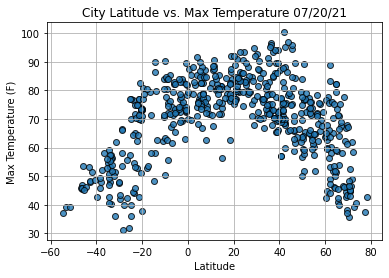

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [20]:
# 6.3.2: Plot Latitude vs. Humidity

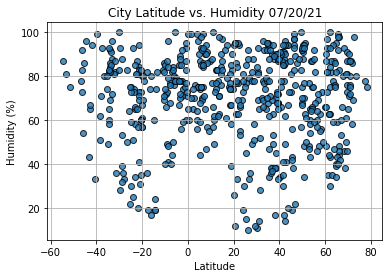

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [22]:
# 6.3.3: Plot Latitude vs. Cloudiness

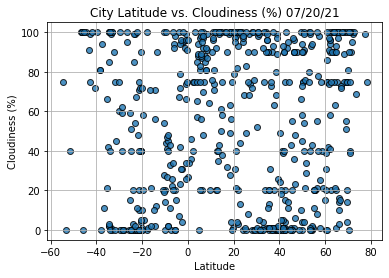

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [24]:
# 6.3.4: Plot Latitude vs. Wind Speed

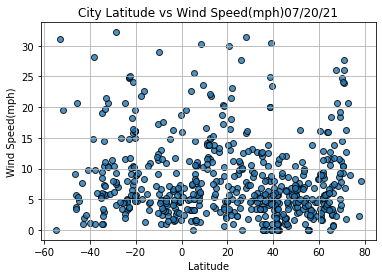

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats, 
           wind_speed, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs Wind Speed(mph)" + time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/fig4.png")
#show plot.
plt.show()

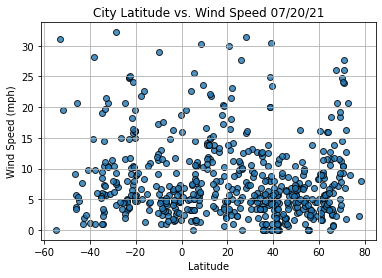

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# 6.4.1: Use Linear Regression to Find the Relationship Between Variables (DONE IN RANDOM_NUMBERS.PY)

In [28]:
# 6.4.2: Find the Correlation Between Latitude and Maximum Temperature

In [47]:
# Create a Linear Regression Function

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel('')
    plt.show()
    # If we run this code there will be no output until we call the function with five parameters.

In [48]:
# Create the Hemisphere DataFrames
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"]<0)]

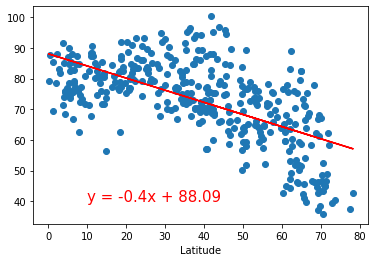

In [49]:
# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))
plt.show()

In [50]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

LinregressResult(slope=-0.39629931327733653, intercept=88.09204724338812, rvalue=-0.6224514910015556, pvalue=2.5730208931601755e-43, stderr=0.025264764111231845, intercept_stderr=1.0997023078707888)

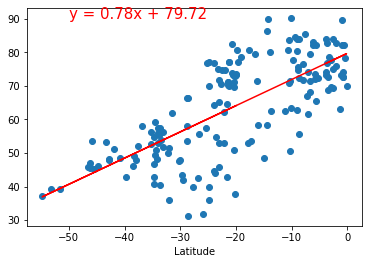

In [51]:
# Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50,90))

In [52]:
linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

LinregressResult(slope=0.7809498683375431, intercept=79.72330514534536, rvalue=0.7239954225091231, pvalue=2.2130986516882509e-29, stderr=0.056900420654158956, intercept_stderr=1.4075607394664666)

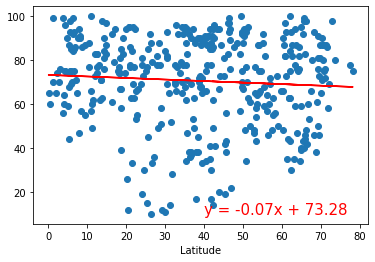

In [53]:
# 6.4.3: Find the Correlation Between Latitude and Percent Humidity
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [54]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

LinregressResult(slope=-0.06973637014716795, intercept=73.28075242875866, rvalue=-0.06969854146660392, pvalue=0.16898884046092622, stderr=0.05060616185881299, intercept_stderr=2.2027402568891787)

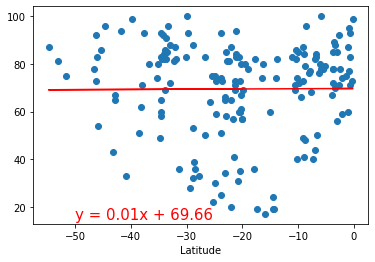

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [56]:
linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

LinregressResult(slope=0.009780921837391614, intercept=69.6596809446629, rvalue=0.006629029034636942, pvalue=0.9310211712038974, stderr=0.11282939759091029, intercept_stderr=2.7910906190288354)

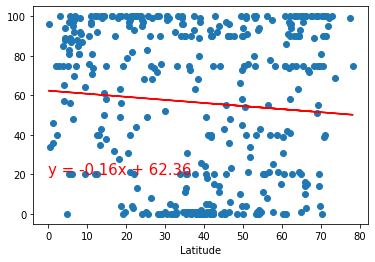

In [57]:
# 6.4.4: Find the Correlation Between Latitude and Percent Cloudiness
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Cloudiness',(0,20))


In [58]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

LinregressResult(slope=-0.1558122370479228, intercept=62.35501681703034, rvalue=-0.08255462022219831, pvalue=0.10310808254163481, stderr=0.09536749962425911, intercept_stderr=4.15107217985226)

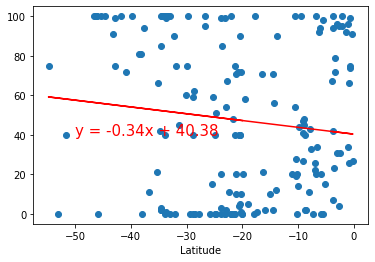

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,40))

In [60]:
linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

LinregressResult(slope=-0.34319177906021614, intercept=40.378874159691, rvalue=-0.12055011274735279, pvalue=0.114138610239653, stderr=0.2161187219239044, intercept_stderr=5.346185925279693)

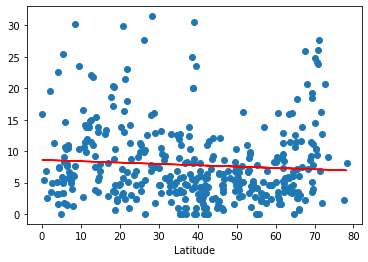

In [61]:
#6.4.5: Find the Correlation Between Latitude and Wind Speed
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [62]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

LinregressResult(slope=-0.02132380451602081, intercept=8.600255426199944, rvalue=-0.07096115085773812, pvalue=0.16138176880961266, stderr=0.015197530987797863, intercept_stderr=0.6615046880168266)

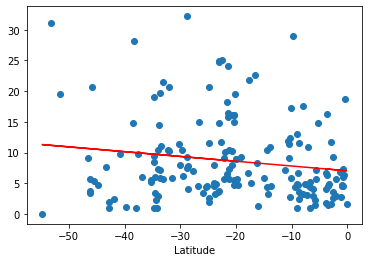

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [64]:
linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

LinregressResult(slope=-0.0778893948368428, intercept=7.027960310124373, rvalue=-0.15769048576315303, pvalue=0.03826169409956881, stderr=0.03729983138620858, intercept_stderr=0.9226957840444158)